<a href="https://colab.research.google.com/github/ramirojc/Mentoria/blob/master/2_0_Intro_Variables_Georeferenciadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduccion, Analisis y Curacion de Datos

## Diplodatos 2020, Mentorias
### Mentor: Ramiro Caro

## Instalacion de Librerias


In [5]:
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree
!pip install osmnx
!pip install contextily

## Cargar informacion


In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString
import contextily as ctx

In [2]:
# Editar con el path correspondiente a sus datos
data_path = './drive/My Drive/BDGD/SULGIPE_46_2018-12-31_M10_20190611-1750.gdb'

Cargamos las capas de interes:
- CONJ: Area de cobertura de cada subestacion
- UNTRS: Transformadores de Segmentacion (Sub Estacion)
- UNTRD: Transformadores de Distribucion (Media a Baja)
- SSDMT: Lineas de transmicion de media tension (UNTRS a UNTRD)

In [3]:
conj = gpd.read_file(data_path, driver='FileGDB', layer='CONJ')
conj.shape, conj.columns

((6, 9), Index(['COD_ID', 'DIST', 'NOM', 'SIST_INTE', 'SIST_SUBT', 'DESCR',
        'Shape_Length', 'Shape_Area', 'geometry'],
       dtype='object'))

In [4]:
untrs = gpd.read_file(data_path, driver='FileGDB', layer='UNTRS')
untrs.shape, untrs.columns

((17, 53),
 Index(['COD_ID', 'SUB', 'BARR_1', 'BARR_2', 'BARR_3', 'PAC_1', 'PAC_2',
        'PAC_3', 'DIST', 'FAS_CON_P', 'FAS_CON_S', 'FAS_CON_T', 'SIT_ATIV',
        'TIP_UNID', 'POS', 'POT_NOM', 'POT_F01', 'POT_F02', 'PER_FER',
        'PER_TOT', 'BANC', 'DAT_CON', 'CONJ', 'MUN', 'TIP_TRAFO', 'ALOC_PERD',
        'ENES_01', 'ENES_02', 'ENES_03', 'ENES_04', 'ENES_05', 'ENES_06',
        'ENES_07', 'ENES_08', 'ENES_09', 'ENES_10', 'ENES_11', 'ENES_12',
        'ENET_01', 'ENET_02', 'ENET_03', 'ENET_04', 'ENET_05', 'ENET_06',
        'ENET_07', 'ENET_08', 'ENET_09', 'ENET_10', 'ENET_11', 'ENET_12',
        'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [5]:
untrd = gpd.read_file(data_path, driver='FileGDB', layer='UNTRD')
untrd.shape, untrd.columns

((10508, 33),
 Index(['COD_ID', 'DIST', 'PAC_1', 'PAC_2', 'PAC_3', 'FAS_CON_P', 'FAS_CON_S',
        'FAS_CON_T', 'SIT_ATIV', 'TIP_UNID', 'POS', 'ATRB_PER', 'TEN_LIN_SE',
        'CAP_ELO', 'CAP_CHA', 'TAP', 'CONF', 'POSTO', 'POT_NOM', 'PER_FER',
        'PER_TOT', 'DAT_CON', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ', 'MUN', 'BANC',
        'TIP_TRAFO', 'MRT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [6]:
ssmt = gpd.read_file(data_path, driver='FileGDB', layer='SSDMT')
ssmt.columns, ssmt.columns

(Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

## Manejo de objetos graficos con Shapely

https://shapely.readthedocs.io/en/latest/manual.html

### Objetos geometricos basicos

In [63]:
untrd.geometry.head()

0    POINT (-37.83074 -11.06938)
1    POINT (-37.84323 -11.05677)
2    POINT (-37.78738 -11.27583)
3    POINT (-37.75730 -11.09419)
4    POINT (-37.79758 -11.57597)
Name: geometry, dtype: geometry

In [11]:
p = Point(1,0)
o = Point(0,0)

In [12]:
p.length, p.area, p.bounds, p.x, p.y

(0.0, 0.0, (1.0, 0.0, 1.0, 0.0), 1.0, 0.0)

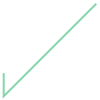

In [27]:
l = LineString([(1,1),(-1,-1),(-1,-0.5)])
l

In [17]:
l.area, l.length, l.bounds, l.xy, l.centroid.xy

(0.0,
 2.8284271247461903,
 (-1.0, -1.0, 1.0, 1.0),
 (array('d', [1.0, -1.0]), array('d', [1.0, -1.0])),
 (array('d', [0.0]), array('d', [0.0])))

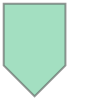

In [18]:
c = Polygon([(0,0),(0,1),(1,1),(1,0),(0.5,-0.5)])
c

In [23]:
c.area, c.length, c.bounds, c.centroid.x, c.centroid.y

(1.25, 4.414213562373095, (0.0, -0.5, 1.0, 1.0), 0.5, 0.36666666666666664)

### Operaciones Basicas



In [24]:
p.distance(l) # Distancia del punto a linea

0.7071067811865476

In [30]:
l.contains(p) # Contiene

False

In [31]:
l.intersects(c) # Interseccion

True

### Joints Espaciales

In [56]:
st = gpd.sjoin(untrd[['COD_ID','CONJ','geometry']], conj[['NOM','geometry']].iloc[[0,5]], how='inner', op='within', lsuffix='untrs',rsuffix='conj')
st.head()

,COD_ID,CONJ,geometry,index_conj,NOM
2,7_2070013,15601,POINT (-37.78738 -11.27583),5,ITABAIANINHA
38,7_1070502,15601,POINT (-37.76480 -11.24085),5,ITABAIANINHA
39,7_1070503,15601,POINT (-37.77345 -11.24325),5,ITABAIANINHA
40,7_1070504,15601,POINT (-37.77617 -11.24710),5,ITABAIANINHA
41,7_1070505,15601,POINT (-37.77779 -11.24962),5,ITABAIANINHA


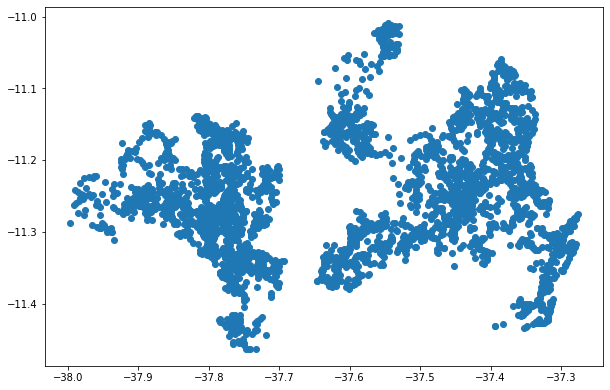

In [57]:
ax = st.plot(figsize=(10,10))

## Sistemas de Coordenadas de Referencia, CRS
https://geopandas.org/projections.html

In [58]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [59]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'WGS 84 - EPSG 4326')

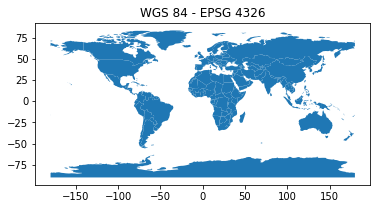

In [60]:
ax = world.plot()
ax.set_title('WGS 84 - EPSG 4326')

Text(0.5, 1.0, 'Mercator - EPSG 3395')

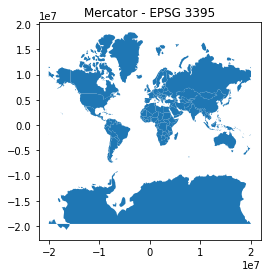

In [61]:
ax = world.to_crs('EPSG:3395').plot()
ax.set_title('Mercator - EPSG 3395')

### Conversion a un sistema de referencia UTM local metrico

Primero encontramos que nuestra zona correspondiente es 24S o (24L)

https://www.latlong.net/lat-long-utm.html

Luego encontramos que el sistema correspondiente es EPSG 31984

https://epsg.io/31984

In [64]:
conj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [65]:
conj = conj.to_crs(epsg=31984)
untrs = untrs.to_crs(epsg=31984)
untrd = untrd.to_crs(epsg=31984)
ssmt = ssmt.to_crs(epsg=31984)

In [66]:
conj.crs

<Projected CRS: EPSG:31984>
Name: SIRGAS 2000 / UTM zone 24S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 42°W to 36°W
- bounds: (-42.0, -26.35, -36.0, 0.74)
Coordinate Operation:
- name: UTM zone 24S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [68]:
untrd.geometry.head()

0    POINT (627712.617 8776098.670)
1    POINT (626353.418 8777498.606)
2    POINT (632355.415 8753247.956)
3    POINT (635724.137 8773322.662)
4    POINT (631104.558 8720058.235)
Name: geometry, dtype: geometry

## Generacion de features a partir de variables georeferenciadas

### Distancia Euclideana a puntos de referencia dentro del dataset

Ejemplos:

- Distancia a inmuebles mejor valuados
- Distancia a regiones de alto rendimiento
- Distancia a transformador de Sub Estacion

In [69]:
dist_untrs = untrd.distance(untrs.geometry[0])
dist_untrs.head()

0    33373.033284
1    34767.345733
2    11843.951688
3    31834.700389
4    23063.913506
dtype: float64

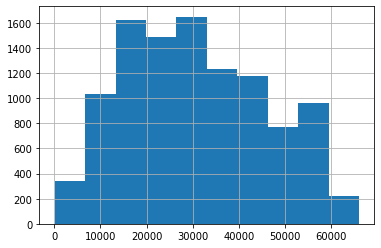

In [70]:
dist_untrs.hist()

In [71]:
untrd['eu_dis_trs'] = -1

for i,t in untrs.iterrows():
  eud = untrd[untrd.UNI_TR_S == t.COD_ID].distance(t.geometry)
  untrd.eu_dis_trs.loc[eud.index] = eud

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


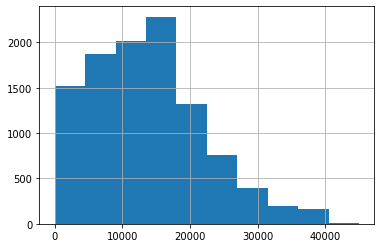

In [72]:
untrd.eu_dis_trs.hist()

### Distancia Euclideana a objectos geograficos personalizados

Ejemplos:

- Distancia a parques o plazas
- Distancia a edificios de interes
- Distancia al mar o cuerpos de agua


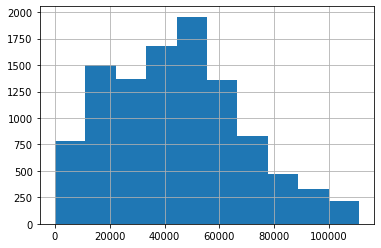

In [75]:
l_costa = LineString([(700193.83391362486872822, 8763788.64822966419160366),
                  (686834.44766193581745028, 8746861.22714056819677353), 
                  (683515.34548760310281068, 8735493.30219347961246967), 
                  (675383.54516048799268901, 8726697.68143149651587009), 
                  (657418.90464191255159676, 8691100.3106117807328701)])

untrd['dist_mar'] = untrd.distance(l_costa)
untrd.dist_mar.hist()

### Descargar Referencias de OSM

https://osmnx.readthedocs.io/en/stable/index.html

In [77]:
import osmnx as ox

In [84]:
my_place = 'Itabaianinha, Sergipe, Brazil'

/usr/local/lib/python3.6/dist-packages/osmnx/utils_graph.py:56: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes = gpd.GeoDataFrame(data, index=nodes, crs=crs)


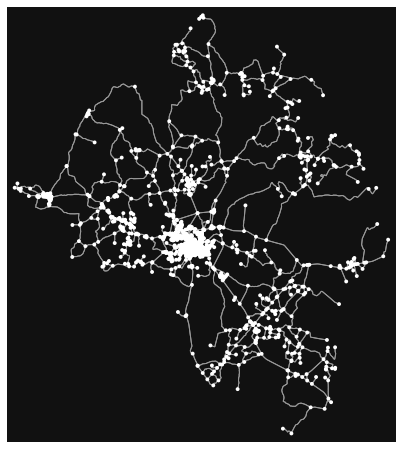

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f100e06c400>)

In [93]:
G = ox.graph_from_place(my_place)
ox.plot_graph(G)

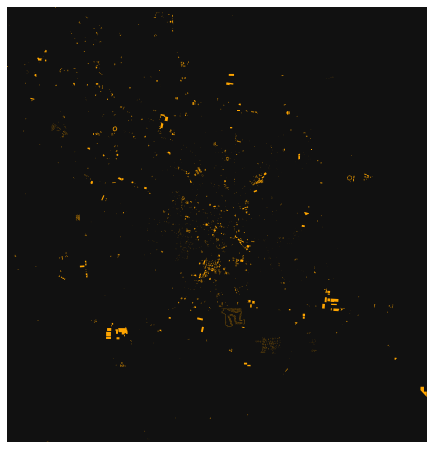

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f100e068860>)

In [95]:
F = ox.footprints_from_place('Cordoba, Cordoba, Argentina')
ox.plot_footprints(F)

Descargar datos por poligono

In [110]:
G.graph['crs']

'epsg:4326'

In [111]:
dist = conj_deg.dissolve(by='DIST')

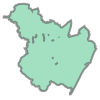

In [112]:
dist.iloc[0].geometry

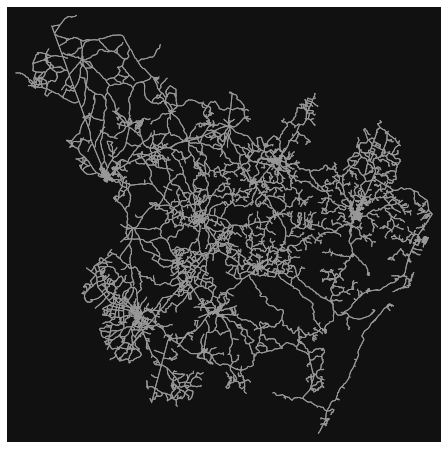

In [113]:
G_conj = ox.graph_from_polygon(dist.to_crs(epsg=4326).iloc[0].geometry)
fig, ax = ox.plot_graph(G_conj, node_size=0)

Convertir el grafo a un GeoDataFrame

In [114]:
nodes, edges = ox.graph_to_gdfs(G_conj)

In [115]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [116]:
edges.to_csv('edges_conj.csv')

Queremos encontrar autopistas y caminos principales

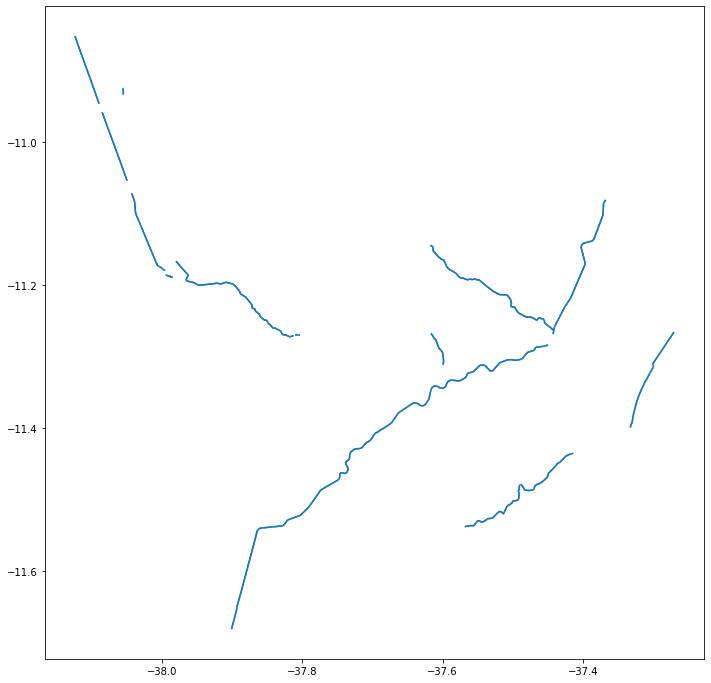

In [118]:
edges[edges.name.str.contains('Rodovia').fillna(False)].plot(figsize=(12,12))

In [123]:
#mask = edges.highway.str.contains('trunk').fillna(False)
mask = (edges.highway.str.contains('trunk').fillna(False) | edges.highway.str.contains('primary').fillna(False))

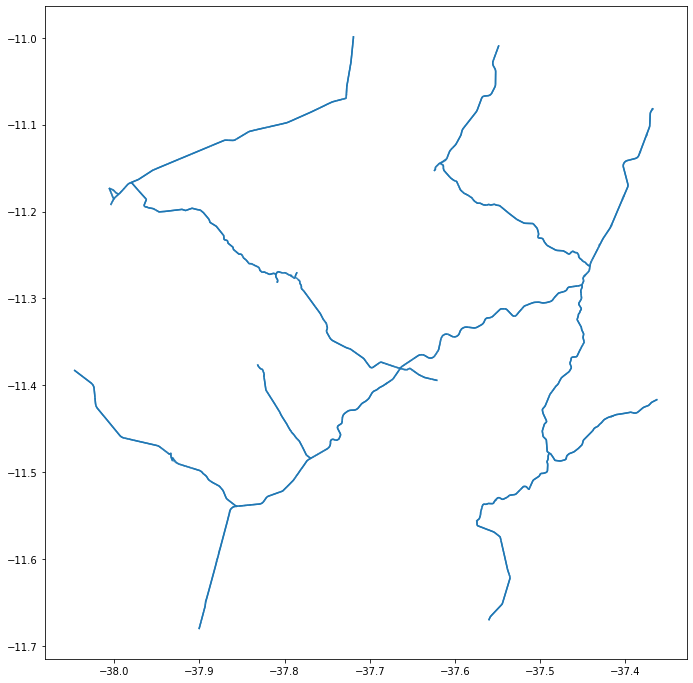

In [124]:
main_roads = edges[['geometry','length','name', 'ref']][mask]
main_roads.plot(figsize=(12,12))

In [126]:
main_roads.sample(5)

,geometry,length,name,ref
17130,"LINESTRING (-37.44763 -11.27360, -37.44760 -11...",86.356,NaN,NaN
2830,"LINESTRING (-37.43545 -11.24870, -37.43533 -11...",32.555,NaN,NaN
8011,"LINESTRING (-37.38273 -11.13089, -37.38275 -11...",106.914,NaN,NaN
14078,"LINESTRING (-37.78391 -11.27841, -37.78306 -11...",129.841,Rua Alcino Carvalho Lima,NaN
36271,"LINESTRING (-37.54560 -11.58028, -37.54552 -11...",38.794,Linha Verde,BA-099


Ahora queremos unificar todas las lineas en 1, volvemos a usar dissolve pero primero definimos una variable homogenea


In [127]:
main_roads['dist'] = 46

In [128]:
main_roads_comb = main_roads.dissolve(by='dist')
main_roads_comb.to_crs(epsg=31984, inplace= True)

In [129]:
untrd['main_r_dist'] = untrd.distance(main_roads_comb.iloc[0].geometry)

In [130]:
untrd.head()

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_S,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry,eu_dis_trs,dist_mar,main_r_dist
0,4_1040341,46,452971,ET4_1040341,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (627712.617 8776098.670),6030.232571,65956.189519,3868.829691
1,4_1040306,46,452681,ET4_1040306,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,15/03/2011,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (626353.418 8777498.606),6839.156041,67798.259119,5529.165862
2,7_2070013,46,600021,ET7_2070013,0,ABC,ABCN,0,AT,38,O,2,0.38,5H,1,1.0,RA,PT,112.5,440.0,1990.0,30/09/2010,1_SEITI_1,1_SEITI_1,SEITI,15601,2803005,0,T,0,,UB,POINT (632355.415 8753247.956),802.511258,50560.232126,1.977559
3,4_1040035,46,462831,ET4_1040035,ET4_1040035,AB,AN,BN,AT,38,PD,1,0.23,1H,1,1.0,RA,PT,15.0,85.0,355.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,MT,0,,NU,POINT (635724.137 8773322.662),11259.764183,57554.073637,1420.588809
4,13_1130368,46,148261,ET13_1130368,0,ABC,ABCN,0,AT,38,PD,1,0.38,2H,1,1.0,RA,PT,45.0,220.0,1000.0,18/10/2013,1_SETMG_1,2_SETMG_1,SETMG,12743,2917904,0,T,0,,NU,POINT (631104.558 8720058.235),23063.913506,36539.002419,5473.898753


## Generacion de features a traves de arboles de busqueda espaciales

### Calculo de densidades

In [131]:
from scipy.spatial import cKDTree

Vamos a cargar los consumidores de baja tension

In [132]:
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')
ucbt = ucbt.to_crs(epsg=31984)
ucbt.shape, ssmt.columns

((148801, 40),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

In [135]:
ucbt.head()

,DIST,PAC,PN_CON,UNI_TR_D,CTMT,UNI_TR_S,SUB,CONJ,MUN,BRR,CEP,CLAS_SUB,CNAE,TIP_CC,FAS_CON,GRU_TEN,TEN_FORN,GRU_TAR,SIT_ATIV,DAT_CON,CAR_INST,LIV,ENE_01,ENE_02,ENE_03,ENE_04,ENE_05,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12,DIC,FIC,SEMRED,DESCR,ARE_LOC,geometry
0,46,UC111674,99151,14_1140342,3_SETMG_1,2_SETMG_1,SETMG,12743,2927002,RIO REAL,48330000,RE1,0,RES-Tipo1,AN,BT,22,B1,AT,24/07/2007,30.00,0,112.0,124.0,107.0,105.0,118.0,119.0,126.0,109.0,152.0,139.0,188.0,208.0,6.89,8.0,0,,UB,POINT (615834.451 8730092.985)
1,46,UC138742,13334,2_1020023,1_SEAUA_1,2_SEAUA_1,SEAUA,15602,2800670,BOQUIM,49360000,CO1,0,COM-Tipo1,BN,BT,22,B3,DS,15/07/2011,0.32,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,,UB,POINT (651043.740 8767616.764)
2,46,UC72370,100245,5_1050076,7_SEEST_1,1_SEEST_1,SEEST,15602,2802106,BAIRRO ALAGOAS,49200000,RE1,0,RES-Tipo7,ABN,BT,22,B1,AT,01/01/2003,30.00,0,280.0,237.0,258.0,291.0,261.0,306.0,197.0,248.0,220.0,267.0,216.0,230.0,4.91,3.0,0,,UB,POINT (670516.770 8755378.852)
3,46,UC73881,210,5_1050076,7_SEEST_1,1_SEEST_1,SEEST,15602,2802106,BAIRRO ALAGOAS,49200000,RE2,0,RES-Tipo7,AN,BT,22,B1,AT,01/01/2003,2.26,0,71.0,81.0,78.0,80.0,90.0,89.0,74.0,88.0,95.0,91.0,97.0,91.0,4.91,3.0,0,,UB,POINT (670486.416 8755419.941)
4,46,UC73886,212,5_1050076,7_SEEST_1,1_SEEST_1,SEEST,15602,2802106,BAIRRO ALAGOAS,49200000,CO1,0,COM-Tipo6,ABCN,BT,22,B3,AT,01/01/2003,30.00,0,122.0,134.0,165.0,153.0,181.0,174.0,152.0,148.0,97.0,141.0,133.0,126.0,4.91,3.0,0,,UB,POINT (670510.678 8755465.163)


In [134]:
# Convertimos las coordenas a una matriz
ucbt_loc_array = [x.coords[0] for x in ucbt.geometry]
untrd_loc_array = [x.coords[0] for x in untrd.geometry]

Consumidores dentro de un radio de 100 metros

In [136]:
radio = 100
tree = cKDTree(ucbt_loc_array)
near_consumers = tree.query_ball_point(untrd_loc_array, radio)

Por cada untrd obtenemos una lista con el indice de los consumidores dentro del radio definido

In [138]:
near_consumers[0:10]

array([list([100083]), list([104711]),
       list([5543, 5545, 5549, 5550, 5551, 5552, 5553, 5674, 5675, 5676, 5677, 5678, 5679, 8463, 8464, 14893, 14894, 15649, 15650, 15651, 15652, 15653, 15654, 15655, 15656, 15657, 15658, 15668, 15669, 15670, 15671, 15672, 15673, 15674, 15675, 15676, 15677, 15678, 15692, 15693, 15694, 15931, 15950, 15951, 15953, 15955, 15970, 15971, 15973, 15974, 15975, 15976, 15990, 15991, 15992, 16000, 16019, 16020, 16036, 16084, 16400, 16413, 16416, 17404, 23409, 23702, 31180, 39167, 39168, 39894, 40524, 40558, 40664, 41591, 42018, 42122, 42123, 44123, 44418, 44419, 44502, 44889, 45015, 45055, 46516, 51701, 64254, 64987, 64988, 65398, 65519, 66227, 66546, 66812, 66813, 66815, 66816, 66817, 67214, 67437, 67438, 67439, 67441, 67912, 67913, 67915, 69389, 69473, 69474, 69493, 69494, 69496, 69497, 69545, 69546, 69547, 69551, 69552, 69553, 69554, 69555, 70018, 70019, 70020, 70021, 70022, 70188, 99972, 107219, 107747, 114274, 114303, 117881, 118208, 120014, 120015, 120

Podemos convertir estos datos en variables de diferentes formas

In [54]:
untrd['n_close_con'] = [len(c) for c in near_consumers]
untrd['is_urb'] =  untrd['n_close_con'] > 50

### Distancia al elemento mas cercano

Veamos si podemos calcular la distancia al proximo transformador mas cercano

In [139]:
trd_tree = cKDTree(untrd_loc_array)
d, i = trd_tree.query(untrd_loc_array, k=2, n_jobs=-1)

In [142]:
# El primer elemento es el mismo transformador
d[:5]

array([[  0.        , 182.47357502],
       [  0.        , 668.68191247],
       [  0.        ,  35.66382543],
       [  0.        , 191.94049967],
       [  0.        ,  58.1663477 ]])

Nuevamente usamos estos datos para generar nuevas features

In [143]:
untrd['closest_trd_i'] = [ti[1] for ti in i]
untrd['closest_trd_dist'] = [td[1] for td in d]

In [144]:
untrd.head()

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_S,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry,eu_dis_trs,dist_mar,main_r_dist,closest_trd_i,closest_trd_dist
0,4_1040341,46,452971,ET4_1040341,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (627712.617 8776098.670),6030.232571,65956.189519,3868.829691,2054,182.473575
1,4_1040306,46,452681,ET4_1040306,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,15/03/2011,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (626353.418 8777498.606),6839.156041,67798.259119,5529.165862,4111,668.681912
2,7_2070013,46,600021,ET7_2070013,0,ABC,ABCN,0,AT,38,O,2,0.38,5H,1,1.0,RA,PT,112.5,440.0,1990.0,30/09/2010,1_SEITI_1,1_SEITI_1,SEITI,15601,2803005,0,T,0,,UB,POINT (632355.415 8753247.956),802.511258,50560.232126,1.977559,6269,35.663825
3,4_1040035,46,462831,ET4_1040035,ET4_1040035,AB,AN,BN,AT,38,PD,1,0.23,1H,1,1.0,RA,PT,15.0,85.0,355.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,MT,0,,NU,POINT (635724.137 8773322.662),11259.764183,57554.073637,1420.588809,8962,191.940500
4,13_1130368,46,148261,ET13_1130368,0,ABC,ABCN,0,AT,38,PD,1,0.38,2H,1,1.0,RA,PT,45.0,220.0,1000.0,18/10/2013,1_SETMG_1,2_SETMG_1,SETMG,12743,2917904,0,T,0,,NU,POINT (631104.558 8720058.235),23063.913506,36539.002419,5473.898753,5214,58.166348


## Generacion de Features a partir de Grafos

https://networkx.github.io/documentation/stable/tutorial.html

Hasta el momento hemos utilizado la informacion sobre ubicacion de nuestros items pero no la interconexion entre los mismos.

Para captar esta relacion queremos expesar nuestra red como un grafo.

![texto alternativo](https://miro.medium.com/max/908/1*2s-my83GACoXqzP5uIH9Aw.png)

### Creacion y Representacion
En este caso deseamos encontrar el camino a traves de la red electrica desde transformador de distribucion hasta el segmentador.

In [145]:
import networkx as nx

In [147]:
# Generar grafo basado en la red de distribucion
SG = nx.Graph()
SG.add_weighted_edges_from(ssmt[['PN_CON_1','PN_CON_2','COMP']].values.tolist(), weight='length')

In [150]:
# Networkx automaticamente identifica los nodos y los agrega
SG.nodes

NodeView(('56314', '56315', '58888', '58887', '58886', '58845', '39086', '51114', '680897', '55328', '680632', '13448', '680371', '13423', '680361', '14482', '680370', '51140', '51136', '12085', '56088', '53731', '52226', '111917', '53693', '13348', '669350', '13347', '13345', '13092', '13340', '13339', '13338', '103981', '13334', '680697', '680695', '680696', '51416', '680694', '51417', '51415', '51381', '51380', '680070', '679747', '680069', '680068', '679904', '44662', '50679', '670100', '50404', '50405', '13337', '13335', '13332', '13333', '13034', '680732', '680722', '680731', '680727', '14478', '680362', '1355', '53416', '110239', '5862', '675701', '679529', '680929', '55350', '55349', '680642', '680276', '50050', '669897', '50332', '53727', '680360', '10038', '680352', '12750', '12751', '12757', '12758', '10122', '10123', '680257', '12709', '680256', '12646', '680255', '12595', '120349', '12639', '69991', '12775', '12774', '12773', '12772', '12771', '12770', '12769', '12760', '1

In [152]:
# Puedo agregar mas atributos despues de creado el grafo
# Agrego el COD_ID de cada segmento como atributo de Edge

ID_attr_dict = {tuple((x[0], x[1])): x[2] for x in ssmt[['PN_CON_1','PN_CON_2','COD_ID']].values}
nx.set_edge_attributes(SG, ID_attr_dict, 'SEG_ID')

In [153]:
SG.edges['671470', '671471']

{'SEG_ID': '85187', 'length': 25.63}

Debemos asignar el nodo mas cercano a cada transformador de distribucion


In [154]:
ponnot = gpd.read_file(data_path, driver='FileGDB', layer='PONNOT')
ponnot = ponnot.to_crs(epsg=31984)
ponnot_loc_array = [x.coords[0] for x in ponnot.geometry]

ponnot.shape, ponnot.columns

((124647, 24),
 Index(['COD_ID', 'DIST', 'TIP_PN', 'POS', 'ESTR', 'MAT', 'ESF', 'ALT', 'CONJ',
        'MUN', 'ODI', 'TI', 'CM', 'TUC', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6',
        'SITCONT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

Necesito asociar a cada transformador un nodo del grafo, para eso puedo usar un arbol de busqueda

In [155]:
pn_tree = cKDTree(ponnot_loc_array)
pnd, pni = pn_tree.query(untrd_loc_array, n_jobs=-1)

In [156]:
untrd['NODE'] = [ponnot.iloc[i].COD_ID for i in pni]

Un parametro que me interesa mucho calcular, es el recorrido a traves de la red, desde el transformador distribuidor a la subestacion.

Inspeccionando el datase podemos ver que cada transformador esta asociado a un circuito de media tension.

In [157]:
ctmt_endpoints = pd.read_csv('./drive/My Drive/BDGD/endpoints_utf.csv')
ep_dict = {row.CTMT: str(row.PONNOT) for i,row in ctmt_endpoints.iterrows()}

In [158]:
untrd['ENDNODE'] = untrd.CTMT.map(ep_dict)

Chequeamos que todos los valores de nodos sean validos

In [159]:
untrd[untrd.NODE.isna()]

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_S,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry,eu_dis_trs,dist_mar,main_r_dist,closest_trd_i,closest_trd_dist,NODE,ENDNODE


In [160]:
untrd[untrd.ENDNODE.isna()]

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_S,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry,eu_dis_trs,dist_mar,main_r_dist,closest_trd_i,closest_trd_dist,NODE,ENDNODE
4434,5_2051999,46,1111871,ET5_2051999,0,ABC,ABCN,0,AT,38,OD,2,0.22,05H,1,0.957,RA,PT,5000.0,6075.0,33012.0,25/04/2011,1_SE69_1,0,SE69,15602,2802106,0,T,0,,NU,POINT (676658.220 8769770.402),-1.0,22180.829000,235.795132,7027,350.133677,111187,NaN
4435,5_2052000,46,1111861,ET5_2052000,0,ABC,ABCN,0,AT,38,OD,2,0.22,05H,1,0.957,RA,PT,7500.0,12669.0,67931.0,25/04/2011,1_SE69_1,0,SE69,15602,2802106,0,T,0,,NU,POINT (677226.272 8769627.387),-1.0,21646.318207,335.468610,9967,506.252471,111186,NaN
7940,5_2054000,46,6727481,ET5_2054000,0,ABC,ABCN,0,AT,38,OD,2,0.22,05H,1,0.957,RA,PT,15.0,100.0,440.0,07/10/2015,2_SE69_1,0,SE69,15600,2802106,0,T,0,,NU,POINT (674358.386 8762674.380),-1.0,19590.031399,153.338653,7862,527.709800,672748,NaN
8213,5_2050479,46,6599181,ET5_2050479,0,ABC,ABCN,0,AT,38,OD,2,0.22,05H,1,0.957,RA,PT,5000.0,6075.0,33012.0,07/05/2014,3_SECH_1,0,SECH,15600,2802106,0,T,0,,UB,POINT (669278.493 8754050.738),-1.0,18971.046645,637.500167,8419,208.533312,659918,NaN


In [161]:
untrd = untrd[untrd.ENDNODE.notna()]

### Calculo de features por metricas del grafo

La topologia del grafo de por si nos puede proveer informacion importance sobre la red de distribucion.

https://reference.wolframcloud.com/language/guide/GraphMeasures.html

In [162]:
print('calculando degree')
g_degree = SG.degree(untrd.NODE)

print('calculando neighbor degree')
g_avg_ndeg = nx.average_neighbor_degree(SG)

print('calculando closeness centrality')
#g_bet_cen = nx.betweenness_centrality(SG)

print('calculando pagerank')
g_pr = nx.pagerank(SG)

calculando degree
calculando neighbor degree
calculando closeness centrality
calculando pagerank


In [163]:
# Adicionar al grafico como Atributo de los nodos
nx.set_node_attributes(SG, g_degree, 'degree')
nx.set_node_attributes(SG, g_avg_ndeg, 'avg_nei_degree')
#nx.set_node_attributes(SG, betweenness, 'betweenness')
nx.set_node_attributes(SG, g_pr, 'pagerank')

In [164]:
# Mapear valores a al dataframe de transformadores
untrd['g_degree'] = untrd.NODE.map(g_degree)
untrd['g_avg_ndeg'] = untrd.NODE.map(g_avg_ndeg)
untrd['g_pagerank'] = untrd.NODE.map(g_pr)

In [165]:
untrd.head()

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_S,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry,eu_dis_trs,dist_mar,main_r_dist,closest_trd_i,closest_trd_dist,NODE,ENDNODE,g_degree,g_avg_ndeg,g_pagerank
0,4_1040341,46,452971,ET4_1040341,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (627712.617 8776098.670),6030.232571,65956.189519,3868.829691,2054,182.473575,45297,44304,2,2.0,0.000012
1,4_1040306,46,452681,ET4_1040306,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,15/03/2011,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (626353.418 8777498.606),6839.156041,67798.259119,5529.165862,4111,668.681912,45268,44304,1,2.0,0.000007
2,7_2070013,46,600021,ET7_2070013,0,ABC,ABCN,0,AT,38,O,2,0.38,5H,1,1.0,RA,PT,112.5,440.0,1990.0,30/09/2010,1_SEITI_1,1_SEITI_1,SEITI,15601,2803005,0,T,0,,UB,POINT (632355.415 8753247.956),802.511258,50560.232126,1.977559,6269,35.663825,60002,48689,1,3.0,0.000006
3,4_1040035,46,462831,ET4_1040035,ET4_1040035,AB,AN,BN,AT,38,PD,1,0.23,1H,1,1.0,RA,PT,15.0,85.0,355.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,MT,0,,NU,POINT (635724.137 8773322.662),11259.764183,57554.073637,1420.588809,8962,191.940500,46283,44304,2,2.0,0.000012
4,13_1130368,46,148261,ET13_1130368,0,ABC,ABCN,0,AT,38,PD,1,0.38,2H,1,1.0,RA,PT,45.0,220.0,1000.0,18/10/2013,1_SETMG_1,2_SETMG_1,SETMG,12743,2917904,0,T,0,,NU,POINT (631104.558 8720058.235),23063.913506,36539.002419,5473.898753,5214,58.166348,14826,17749,2,2.5,0.000011


### Calculo de features por rutas de conexion

#### Calculo de distancia compensada por pesos


In [167]:
nx.shortest_path_length(SG, untrd.NODE[0], untrd.ENDNODE[0], weight='length')

8170.229999999999

In [168]:
untrd['dist_to_trs'] = [nx.shortest_path_length(SG, trd.NODE, trd.ENDNODE, weight='length') for i, trd in untrd.iterrows()]

#### Calculo de ruta


In [169]:
path = nx.shortest_path(SG,untrd.NODE[0], untrd.ENDNODE[0])

El resultado es la secuencia de nodos de la ruta

In [170]:
untrd.NODE[0], path[:5], path[-5:], untrd.ENDNODE[0]

('45297',
 ['45297', '45296', '45295', '45345', '45306'],
 ['44326', '44307', '44305', '44306', '44304'],
 '44304')

In [171]:
ponnot.set_index('COD_ID', inplace=True)
path_ponnot = ponnot.loc[path]

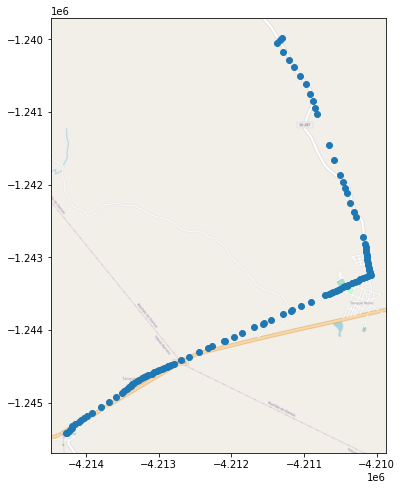

In [172]:
ax = path_ponnot.to_crs(epsg=3857).plot(figsize=(8,8))
ctx.add_basemap(ax, source= ctx.sources.OSM_A)

In [173]:
untrd_node_paths = [nx.shortest_path(SG, trd.NODE, trd.ENDNODE) for i, trd in untrd.iterrows()]

Queremos tener la ruta pero referenciada por los segmentos de lineas de transmision

In [175]:
SG.edges[path[0:2]]['SEG_ID']

'45524'

In [176]:
seg_path = [SG.edges[path[i-1:i+1]]['SEG_ID'] for i in range(1,len(path))]

In [177]:
ssmt.set_index('COD_ID', inplace=True)

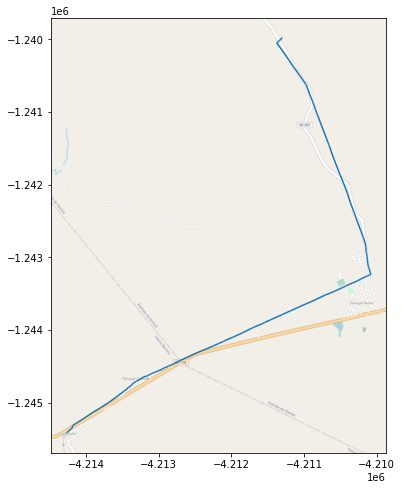

In [178]:
ax = ssmt.loc[seg_path].to_crs(epsg=3857).plot(figsize=(8,8))
ctx.add_basemap(ax, source= ctx.sources.OSM_A)

In [179]:
untrd_seg_paths = [[SG.edges[path[i-1:i+1]]['SEG_ID'] for i in range(1,len(path))] for path in untrd_node_paths]

Podemos utilizar estas referencia para captar informacion sobre la red de distribucion.

En este caso, agregaremos los datos de resistencia y reactancia electrica.

In [180]:
# Carguemos la tabla de consumidores de baja tension denominada UCBT
cond = gpd.read_file(data_path, driver='FileGDB', layer='SEGCON')
cond.set_index('COD_ID', inplace=True)
cond.shape, cond.columns

((82, 39),
 Index(['DIST', 'GEOM_CAB', 'FORM_CAB', 'MAT_FAS_1', 'MAT_FAS_2', 'MAT_FAS_3',
        'MAT_NEU', 'ISO_FAS_1', 'ISO_FAS_2', 'ISO_FAS_3', 'ISO_NEU', 'CND_FAS',
        'R1', 'X1', 'FTRCNV', 'CNOM', 'CMAX', 'CM_FAS', 'TUC_FAS', 'A1_FAS',
        'A2_FAS', 'A3_FAS', 'A4_FAS', 'A5_FAS', 'A6_FAS', 'CM_NEU', 'TUC_NEU',
        'A1_NEU', 'A2_NEU', 'A3_NEU', 'A4_NEU', 'A5_NEU', 'A6_NEU', 'DESCR',
        'BIT_FAS_1', 'BIT_FAS_2', 'BIT_FAS_3', 'BIT_NEU', 'geometry'],
       dtype='object'))

In [182]:
cond= cond[['R1','X1']]

In [183]:
ssmt = ssmt.join(cond, on='TIP_CND', how='left')

ssmt['R'] = ssmt.R1 * ssmt.COMP / 1000
ssmt['X'] = ssmt.X1 * ssmt.COMP / 1000

ssmt.head()

,PN_CON_1,PN_CON_2,CTMT,UNI_TR_S,SUB,CONJ,DIST,PAC_1,PAC_2,FAS_CON,TIP_CND,POS,ODI_FAS,TI_FAS,ODI_NEU,TI_NEU,COMP,DESCR,SITCONTFAS,SITCONTNEU,ARE_LOC,Shape_Length,geometry,R1,X1,R,X
COD_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
96609,56314,56315,3_SEAUA_1,1_SEAUA_1,SEAUA,15600,46,563141,563151,ABC,45,PD,,40,,40,52.49,,AT1,AT1,UB,0.000481,"MULTILINESTRING ((645757.927 8741603.693, 6458...",1.551,0.4791,0.081412,0.025148
96541,58888,58887,3_SEAUA_1,1_SEAUA_1,SEAUA,15600,46,588881,588871,ABC,45,PD,,41,,41,51.04,,AT1,AT1,NU,0.000467,"MULTILINESTRING ((648261.496 8740743.688, 6483...",1.551,0.4791,0.079163,0.024453
96540,58887,58886,3_SEAUA_1,1_SEAUA_1,SEAUA,15600,46,588871,588861,ABC,45,PD,,41,,41,45.48,,AT1,AT1,NU,0.000416,"MULTILINESTRING ((648218.653 8740758.960, 6482...",1.551,0.4791,0.070539,0.021789
96180,58845,39086,3_SEAUA_1,1_SEAUA_1,SEAUA,15600,46,588451,390861,ABC,45,PD,,41,,41,77.48,,AT1,AT1,NU,0.000709,"MULTILINESTRING ((650939.000 8739162.000, 6510...",1.551,0.4791,0.120171,0.037121
96168,51114,680897,2_SEAUA_1,1_SEAUA_1,SEAUA,15600,46,511141,6808971,ABC,45,PD,,41,,41,63.38,,AT1,AT1,NU,0.000573,"MULTILINESTRING ((652635.435 8754131.147, 6526...",1.551,0.4791,0.098302,0.030365


Calculo la resistencia y reactancia para todos los untrd

In [184]:
untrd_ele = pd.DataFrame([ssmt[['COMP','R','X']].loc[r].sum().to_list() for r in untrd_seg_paths], index=untrd.index, columns=['COMP','R','X'])

In [185]:
untrd[['COMP','R','X']] = untrd_ele

In [186]:
untrd.head()

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_S,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry,eu_dis_trs,dist_mar,main_r_dist,closest_trd_i,closest_trd_dist,NODE,ENDNODE,g_degree,g_avg_ndeg,g_pagerank,dist_to_trs,COMP,R,X
0,4_1040341,46,452971,ET4_1040341,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (627712.617 8776098.670),6030.232571,65956.189519,3868.829691,2054,182.473575,45297,44304,2,2.0,0.000012,8170.23,8170.23,10.595753,3.850102
1,4_1040306,46,452681,ET4_1040306,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,15/03/2011,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (626353.418 8777498.606),6839.156041,67798.259119,5529.165862,4111,668.681912,45268,44304,1,2.0,0.000007,10274.81,10274.81,13.859956,4.858406
2,7_2070013,46,600021,ET7_2070013,0,ABC,ABCN,0,AT,38,O,2,0.38,5H,1,1.0,RA,PT,112.5,440.0,1990.0,30/09/2010,1_SEITI_1,1_SEITI_1,SEITI,15601,2803005,0,T,0,,UB,POINT (632355.415 8753247.956),802.511258,50560.232126,1.977559,6269,35.663825,60002,48689,1,3.0,0.000006,1090.47,1090.47,0.668458,0.484387
3,4_1040035,46,462831,ET4_1040035,ET4_1040035,AB,AN,BN,AT,38,PD,1,0.23,1H,1,1.0,RA,PT,15.0,85.0,355.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,MT,0,,NU,POINT (635724.137 8773322.662),11259.764183,57554.073637,1420.588809,8962,191.940500,46283,44304,2,2.0,0.000012,15507.34,15507.34,11.510700,6.914966
4,13_1130368,46,148261,ET13_1130368,0,ABC,ABCN,0,AT,38,PD,1,0.38,2H,1,1.0,RA,PT,45.0,220.0,1000.0,18/10/2013,1_SETMG_1,2_SETMG_1,SETMG,12743,2917904,0,T,0,,NU,POINT (631104.558 8720058.235),23063.913506,36539.002419,5473.898753,5214,58.166348,14826,17749,2,2.5,0.000011,29516.52,29516.52,17.978488,12.889112


## The End